# Business Problem

### Predict the apple stock market price for next 30 days. There are Open, High, Low and Close price has been given for each day starting from 2012 to 2019 for Apple stock.

--> Split the last year into a test set- can you build a model to predict stock price?

--> Find trends in short term, or long term trends?

--> Understand how it is impacted from external factors or any big external events?

--> Forecast for next 30 days.

# Data collection and description

In [60]:
#import libraries
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import itertools
import statsmodels.api as sm
plt.style.use('fivethirtyeight')
from pylab import rcParams
from alpha_vantage.timeseries import TimeSeries
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from datetime import datetime,time
from pmdarima import auto_arima
from pandas.core.groupby.groupby import Index
import altair as alt
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv("AAPL.csv",parse_dates=['Date']).fillna(0)

In [8]:
data = data.set_index('Date')

In [9]:
# Checking first few records of dataset
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [10]:
# Checking last few records of dataset
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500
2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614,36028600


In [11]:
# Checking how many rows and column in dataset
data.shape

(2011, 6)

In [12]:
# Checking datatype of each column
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [13]:
# Checking null values & datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 2012-01-03 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2011 non-null   float64
 1   High       2011 non-null   float64
 2   Low        2011 non-null   float64
 3   Close      2011 non-null   float64
 4   Adj Close  2011 non-null   float64
 5   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.0 KB


In [14]:
# Checking null values
data[data.columns[0:11]].isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
# check duplicate values
data.duplicated().sum()

0

In [16]:
# Checking some statistical data like percentile, mean and std of the numerical values from dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2011.0,1.267075e+02,5.048375e+01,5.542429e+01,8.588286e+01,1.130500e+02,1.651900e+02,2.911200e+02
High,2011.0,1.278276e+02,5.092630e+01,5.708571e+01,8.671786e+01,1.141900e+02,1.674100e+02,2.939700e+02
Low,2011.0,1.255803e+02,5.012494e+01,5.501429e+01,8.505643e+01,1.118700e+02,1.634250e+02,2.881200e+02
Close,2011.0,1.267412e+02,5.057837e+01,5.579000e+01,8.620214e+01,1.130500e+02,1.652450e+02,2.915200e+02
Adj Close,2011.0,1.195055e+02,5.243844e+01,4.892193e+01,7.505668e+01,1.052229e+02,1.600471e+02,2.895226e+02
Volume,2011.0,5.949670e+07,4.683856e+07,1.136200e+07,2.758565e+07,4.346900e+07,7.471030e+07,3.765300e+08


# Data Visualization

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>]], dtype=object)

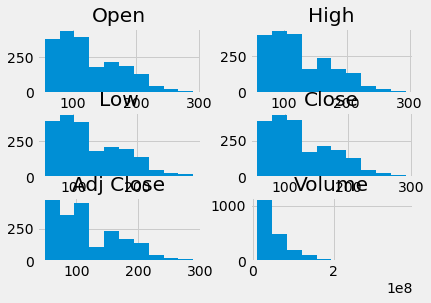

In [17]:
# histgram plot
data.hist()

Skew: 0.7738383526895003
Kurtosis: -0.15503801824484675


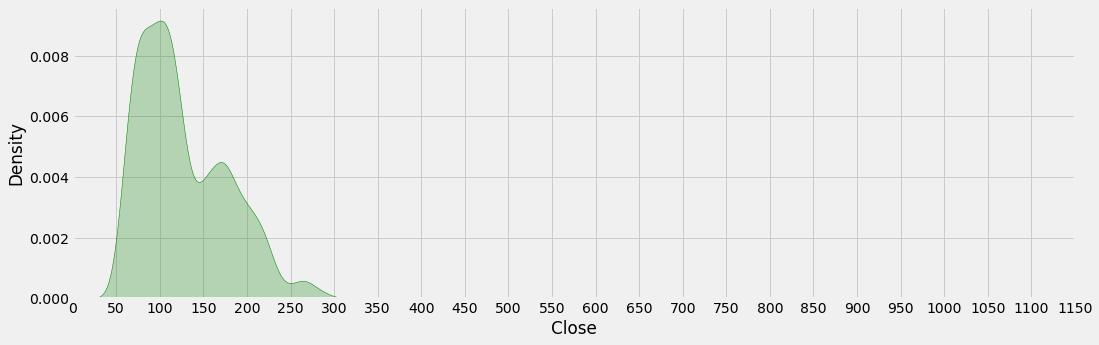

In [18]:
# Checking dataset skewness and kurtosis.
plt.figure(figsize=(16,5))
print("Skew: {}".format(data['Close'].skew()))
print("Kurtosis: {}".format(data['Close'].kurtosis()))
ax = sns.kdeplot(data['Close'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

### The Data is right skewed and has low kurtosis value. we can say data is positively distributed.

In [19]:
data.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=2011, freq=None)

In [20]:
#here we are looking for the changes in stock in a single month
index=data.loc['2019-01-03':'2019-02-03'].index
month_rise=data.loc['2019-01-03':'2019-02-03']['High']

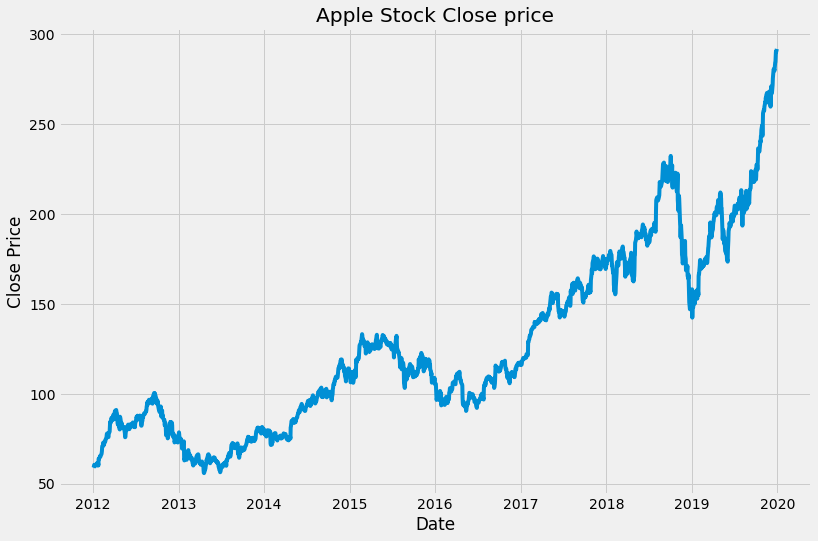

In [21]:
#plot close price
plt.figure(figsize=(12,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(data['Close'])
plt.title('Apple Stock Close price')
plt.show()

# FEATURE SELECTION

###### we can elimenate feature adj close automaticall as they are high multicollinear with Close. we consider close as our target variables as it accounts for all corporate decisions like stock split and dividents.

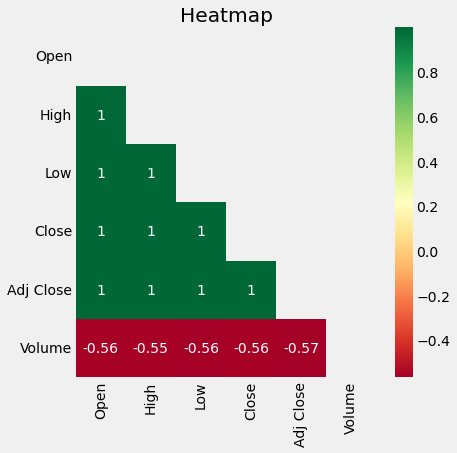

In [22]:
## Heatmap to verify Multicollinearity between feature

plt.figure(figsize = (6,6))
matrix = np.triu(data[['Open','High','Low','Close','Adj Close','Volume']].corr())
sns.heatmap(data[['Open','High','Low','Close','Adj Close','Volume']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Heatmap")
plt.show()

In [23]:
month_rise

Date
2019-01-03    145.720001
2019-01-04    148.550003
2019-01-07    148.830002
2019-01-08    151.820007
2019-01-09    154.529999
2019-01-10    153.970001
2019-01-11    153.699997
2019-01-14    151.270004
2019-01-15    153.389999
2019-01-16    155.880005
2019-01-17    157.660004
2019-01-18    157.880005
2019-01-22    156.729996
2019-01-23    155.139999
2019-01-24    154.479996
2019-01-25    158.130005
2019-01-28    156.330002
2019-01-29    158.130005
2019-01-30    166.149994
2019-01-31    169.000000
2019-02-01    168.979996
Name: High, dtype: float64

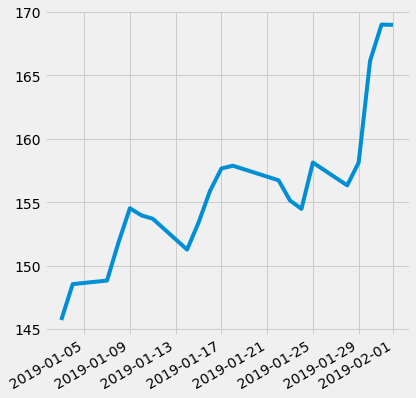

In [24]:
# we have plot Line graph to see change happening in month

figure,axis=plt.subplots(figsize=(6,6))
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index,month_rise)

:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

## Resampling

In [25]:
#It will show every year last day stock, which was the minimum high and minimum low.
#rule=A its deal with year end frequency

data.resample(rule='A').min()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-31,58.485714,58.928570,58.428570,58.747143,50.765709,43938300
2013-12-31,55.424286,57.085712,55.014286,55.790001,48.921928,41888700
2014-12-31,70.739998,71.647141,70.507141,71.397141,63.808632,14479600
2015-12-31,94.870003,107.029999,92.000000,103.120003,95.294647,13046400
2016-12-31,90.000000,91.669998,89.470001,90.339996,84.809998,11475900
2017-12-31,115.800003,116.330002,114.760002,116.019997,110.070328,14026700
2018-12-31,148.149994,151.550003,146.589996,146.830002,143.665421,12513900
2019-12-31,143.979996,145.720001,142.000000,142.190002,139.125412,11362000


<AxesSubplot:xlabel='Date'>

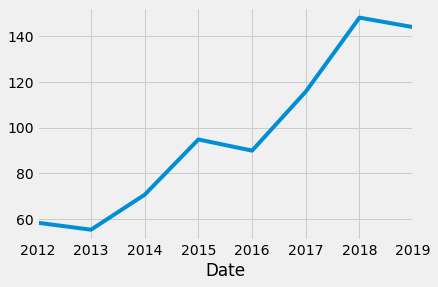

In [26]:
data.resample(rule='A').min()['Open'].plot()

In [27]:
data.resample(rule='A').min()['High']

Date
2012-12-31     58.928570
2013-12-31     57.085712
2014-12-31     71.647141
2015-12-31    107.029999
2016-12-31     91.669998
2017-12-31    116.330002
2018-12-31    151.550003
2019-12-31    145.720001
Freq: A-DEC, Name: High, dtype: float64

<AxesSubplot:xlabel='Date'>

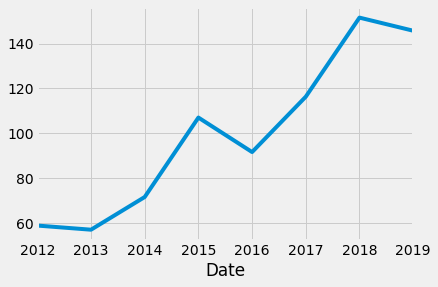

In [28]:
data.resample(rule='A').min()['High'].plot()

In [29]:
#rule=m its deal with monthly frequency
data.resample(rule='m').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-31,65.084282,65.462860,64.724289,65.211426,56.351761,239578500
2012-02-29,77.365715,78.230003,76.528572,77.491432,66.963387,376530000
2012-03-31,88.339996,88.778572,87.187141,88.231430,76.244255,354711000
2012-04-30,91.418571,92.000000,89.428574,90.889999,78.541626,269037300
2012-05-31,84.357140,85.251427,83.032860,83.711426,72.338333,183073100
...,...,...,...,...,...,...
2019-08-31,213.899994,218.029999,211.600006,212.639999,210.550949,54017900
2019-09-30,224.800003,226.419998,222.860001,223.970001,221.769623,55413100
2019-10-31,248.970001,249.750000,246.720001,249.050003,246.603241,41698900


<AxesSubplot:xlabel='Date'>

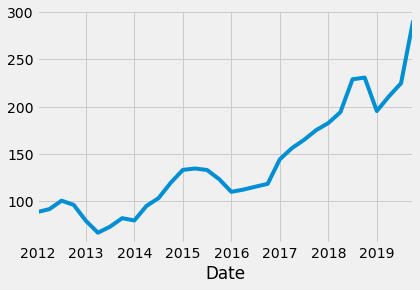

In [30]:
data.resample(rule='QS').max()["Open"].plot()

In [31]:
data.resample(rule='QS').max()['Close']

Date
2012-01-01     88.231430
2012-04-01     90.889999
2012-07-01    100.300003
2012-10-01     95.921425
2013-01-01     78.432854
2013-04-01     66.262856
2013-07-01     72.534286
2013-10-01     81.441429
2014-01-01     79.622856
2014-04-01     94.250000
2014-07-01    103.300003
2014-10-01    119.000000
2015-01-01    133.000000
2015-04-01    132.649994
2015-07-01    132.070007
2015-10-01    122.570000
2016-01-01    109.559998
2016-04-01    112.099998
2016-07-01    115.570000
2016-10-01    118.250000
2017-01-01    144.119995
2017-04-01    156.100006
2017-07-01    164.050003
2017-10-01    176.419998
2018-01-01    181.720001
2018-04-01    193.979996
2018-07-01    228.360001
2018-10-01    232.070007
2019-01-01    195.089996
2019-04-01    211.750000
2019-07-01    223.970001
2019-10-01    291.519989
Freq: QS-JAN, Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

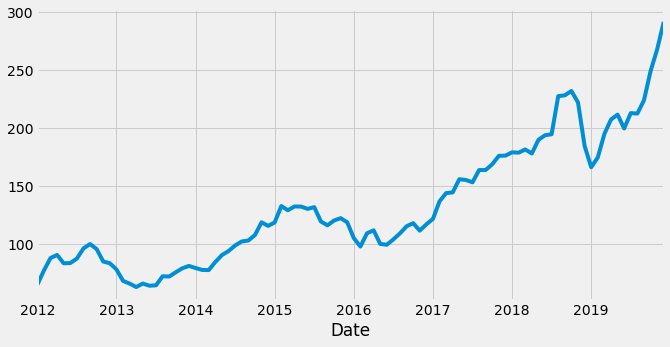

In [32]:
data.resample(rule='m').max()['Close'].plot(figsize=(10,5))

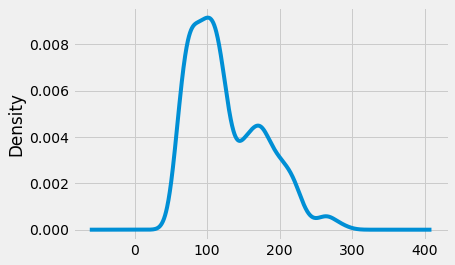

In [33]:
# Distribution plot

data_close=data['Close'].plot(kind='kde')
plt.show()

In [34]:
data_close=data['Close']

we can also visualsize the data in our apple through a probability distribution too

Also, given time Sires is through to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise
1. Level: The average values in series.
2. Trend: The increasing or decreasing values in the series.
3. Seasonality: The repeating long term cylcle in the series.
4. Noise: The random variation in the series.

:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

## Rolling mean & standard deviation

In [35]:
rollmean=data_close.rolling(window=12).mean()
rollstd=data_close.rolling(window=12).std()
print(rollmean, rollstd)

Date
2012-01-03           NaN
2012-01-04           NaN
2012-01-05           NaN
2012-01-06           NaN
2012-01-09           NaN
                 ...    
2019-12-23    275.579997
2019-12-24    276.709996
2019-12-26    278.625829
2019-12-27    280.402494
2019-12-30    282.131660
Name: Close, Length: 2011, dtype: float64 Date
2012-01-03         NaN
2012-01-04         NaN
2012-01-05         NaN
2012-01-06         NaN
2012-01-09         NaN
                ...   
2019-12-23    5.671941
2019-12-24    5.957091
2019-12-26    6.213678
2019-12-27    6.095851
2019-12-30    6.057953
Name: Close, Length: 2011, dtype: float64


:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

## ADF (Augmented Dickey-Fuller) Test

One of the most widely used statistical tests is the Dickey-Fuller test. It can be used to determine whether or not a series has a unit root, and thus whether or not the series is stationary. 

This test’s null and alternate hypotheses are:

Null Hypothesis: The series has a unit root (value of a =1)
Alternate Hypothesis: The series has no unit root.

If the null hypothesis is not rejected, the series is said to be non-stationary. The series can be linear or difference stationary as a result of this.

The series becomes stationary if both the mean and standard deviation are flat lines (constant mean and constant variance).

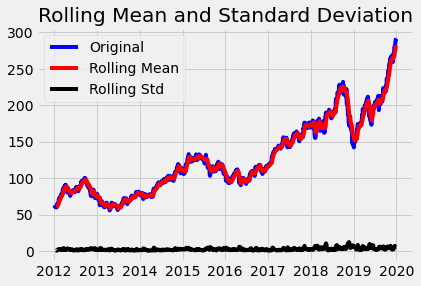

Results of dickey fuller test
Test Statistics                   1.219370
p-value                           0.996117
No. of lags used                  9.000000
Number of observations used    2001.000000
critical value (1%)              -3.433622
critical value (5%)              -2.862985
critical value (10%)             -2.567540
dtype: float64


In [36]:
#Test for staionarity

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    
    adft = adfuller(timeseries,autolag='AIC')
    
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(data_close)

The increasing mean and standard deviation may be seen in the graph above, indicating that our series isn’t stationary.

We can’t rule out the Null hypothesis because the p-value is bigger than 0.05. Additionally, the test statistics exceed the critical values. As a result, the data is nonlinear.

Seasonality and trend may need to be separated from our series before we can undertake a time series analysis. This approach will cause the resulting series to become stagnant.

Let’s isolate the time series from the Trend and Seasonality.

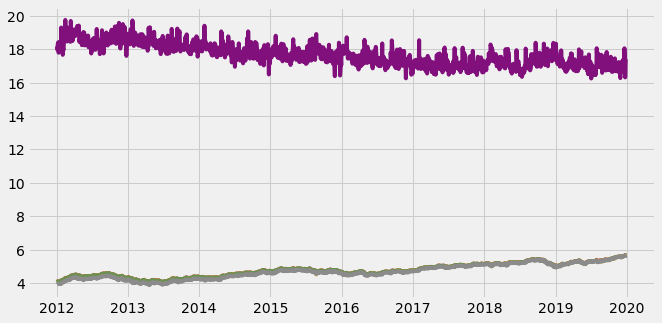

In [37]:
#Estimating trend
rcParams['figure.figsize'] = 10, 5
apple_logscale=np.log(data)
plt.plot(apple_logscale)

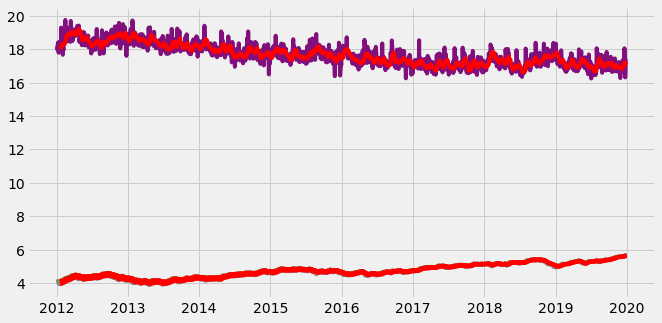

In [38]:
movingAverage=apple_logscale.rolling(window=12).mean()
movingStd=apple_logscale.rolling(window=12).std()
rcParams['figure.figsize'] = 10, 5
plt.plot(apple_logscale)
plt.plot(movingAverage,color='red')

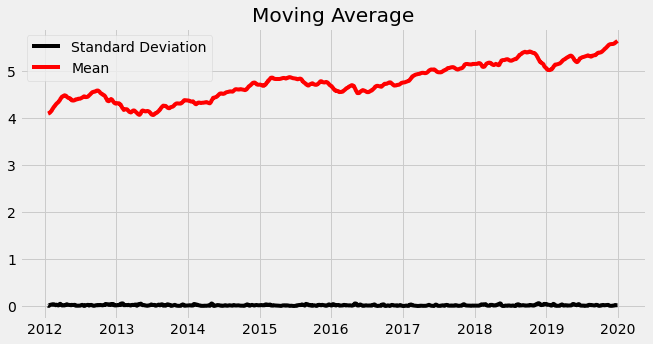

In [39]:
#if not stationary then eliminate trend
#Eliminate trend

rcParams['figure.figsize'] = 10, 5
df_log = np.log(data_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

In [40]:
datasetlogscaleminusmovingAverage=apple_logscale- movingAverage
datasetlogscaleminusmovingAverage.head(12)

#Remove NaNa Values

datasetlogscaleminusmovingAverage.dropna(inplace=True)
datasetlogscaleminusmovingAverage.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-19,0.021712,0.019824,0.018349,0.015307,0.015307,-0.016188
2012-01-20,0.011906,0.007835,0.000210,-0.004081,-0.004081,0.416050
2012-01-23,-0.001969,0.007333,0.003657,0.009925,0.009925,0.100450
2012-01-24,0.001749,-0.001811,-0.004254,-0.007062,-0.007062,0.623733
2012-01-25,0.061878,0.058927,0.047045,0.048852,0.048852,1.091444
2012-01-26,0.044047,0.042393,0.041512,0.039890,0.039890,0.023276
2012-01-27,0.031511,0.037416,0.038642,0.041229,0.041229,-0.067034
2012-01-30,0.030168,0.043524,0.037258,0.048158,0.048158,0.121306
2012-01-31,0.045766,0.046352,0.047790,0.049123,0.049123,0.102399


### Yearly seasonality

In [41]:
#collapse-hide
alt.Chart(data.reset_index()).mark_line(point=True).encode(
    x='quarter(Date)', 
    y='Close',
    column='year(Date)',
    tooltip=['Date', 'Close']).properties(
    title="Close: Yearly Subseries plot",
    width=100).configure_header(
    titleColor='black',
    titleFontSize=14,
    labelColor='blue',
    labelFontSize=14
)

alt.Chart(...)

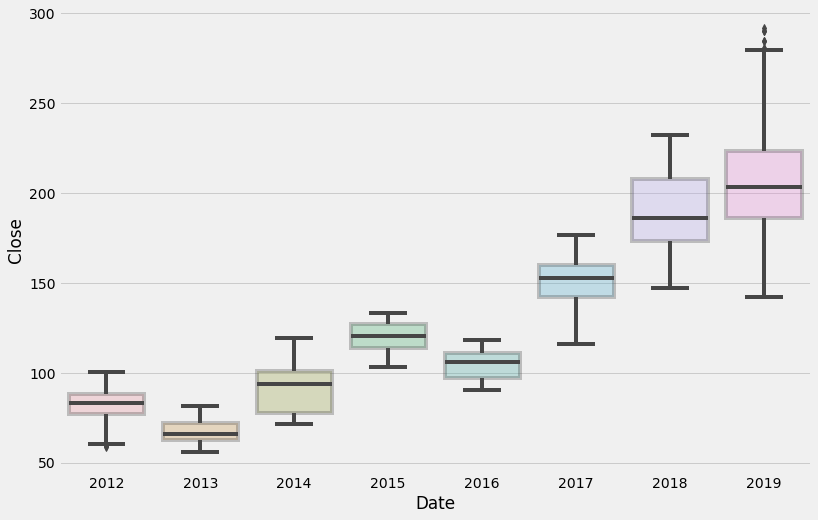

In [42]:
#box plot to see distribution of sales in each year
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data=data, x=data.index.year, y = 'Close',  ax = ax, boxprops=dict(alpha=.3));
#sns.swarmplot(data=apple, x=apple.index.year, y = 'Close');


<Figure size 720x360 with 0 Axes>

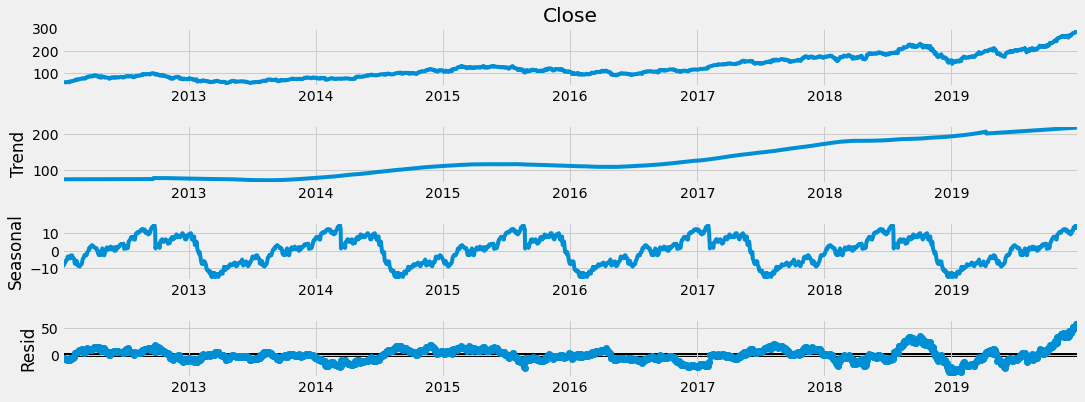

In [43]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(data_close, model='addtive',extrapolate_trend='freq', period=365)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 6)


### Quarter wise yearly seasonality

In [44]:
#collapse-hide
alt.Chart(data.reset_index()).mark_line(point=True).encode(
    x='year(Date)', 
    y='Close',
    column='quarter(Date)',
    tooltip=['Date', 'Close']).properties(
    title="Close: Quarterly Subseries plot",
    width=100).configure_header(
    titleColor='black',
    titleFontSize=14,
    labelColor='blue',
    labelFontSize=14
)

alt.Chart(...)

:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

### Differenced Series

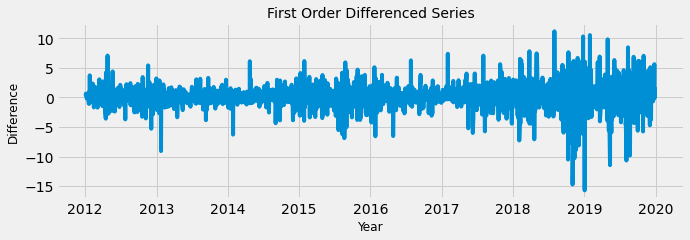

In [45]:
#Change for (t)th day is Close for (t)th day minus Close for (t-1)th day.
data['Diff'] = data['Close'].diff()

# Plot the Change
plt.figure(figsize=(10,3))
plt.plot(data['Diff'])
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

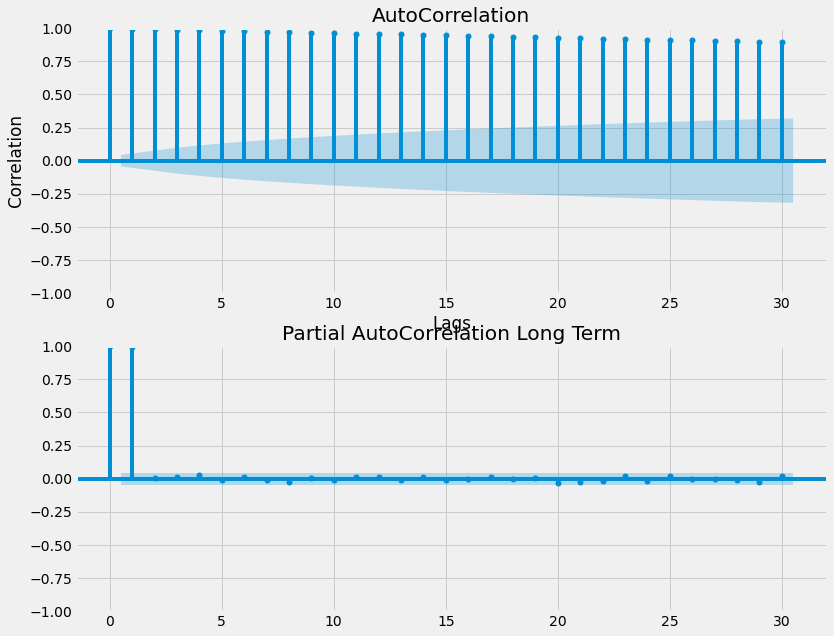

In [46]:
fig,(ax1,ax2)=plt.subplots(2,figsize=(12,10))
acf=plot_acf(data_close,lags=30,ax=ax1)
ax1.set_title('AutoCorrelation')
pacf = plot_pacf(data_close,lags=30,ax=ax2)
ax2.set_title('Partial AutoCorrelation Long Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
plt.show()

### Adfuller test

In [47]:
def adfuller_test(close):
    result = adfuller(close)
    labels = ['ADF Test Statistic', 'p-value','#Lags Used', 'Number of Observations used']
    for value, label in zip(result, labels):
        print(label+' : ' +str(value))
    if result[1] <= 0.05:
        print("Reject Null Hypothesis. Data is Stationary")
    else:
        print("Accept Null Hypothesis. Data is Non - Stationary")

In [48]:
adfuller_test(data['Diff'].dropna())

ADF Test Statistic : -13.62553432387325
p-value : 1.7631231987209785e-25
#Lags Used : 8
Number of Observations used : 2001
Reject Null Hypothesis. Data is Stationary


### Interpreting ACF Plot

Slow Decay of correlation values indicates that the future values are heavily dependent on the lagged values . This shows that the series is not random and good for time series modelling .

Also tells us series is Non-stationary

It indicates a MA(1) process

### Interpreting PACF Plot 

Sudden Decay at Lag-1

Order of series seems AR(1)

Transformations To Make Series Stationary

### After Differencing

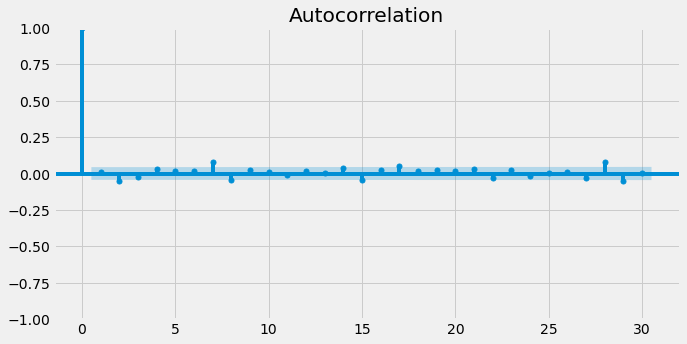

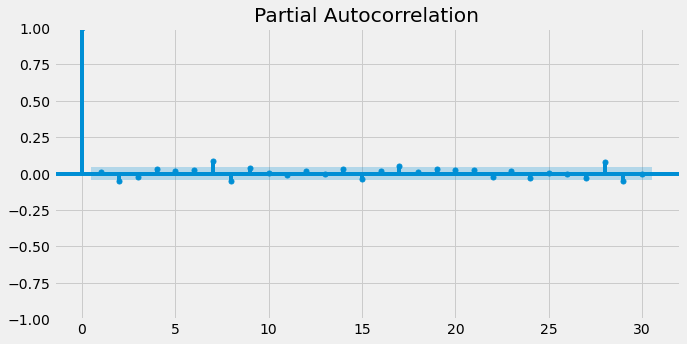

In [49]:
import statsmodels.graphics.tsaplots as tsa_plots

plt.figsize=8,4
tsa_plots.plot_acf((data['Diff'].dropna()),lags=30)
tsa_plots.plot_pacf((data['Diff'].dropna()),lags=30)
plt.show()

======================================================================================================

# ARIMA model

ARIMA (p,d,q) where p is the order of autoregressive model, d is the degree of differencing, and q is the order of moving-average model.

In [50]:
stock = data.copy()
stock

,Open,High,Low,Close,Adj Close,Volume,Diff
Date,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,NaN
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,0.315716
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,0.655712
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,0.624286
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,-0.095714
...,...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000,4.559998
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700,0.269989
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300,5.640015


In [51]:
stock.drop(['Open','High','Low','Adj Close','Volume','Diff'], axis = 1, inplace = True)
#stock.set_index('Date', inplace=True)
stock.head()

,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143


In [52]:
split_date = "2018-01-01"
train = stock.loc[stock.index < split_date]
test = stock.loc[stock.index >= split_date]
print("Train data :", train.shape)
print("Test data :",test.shape)

Train data : (1509, 1)
Test data : (502, 1)


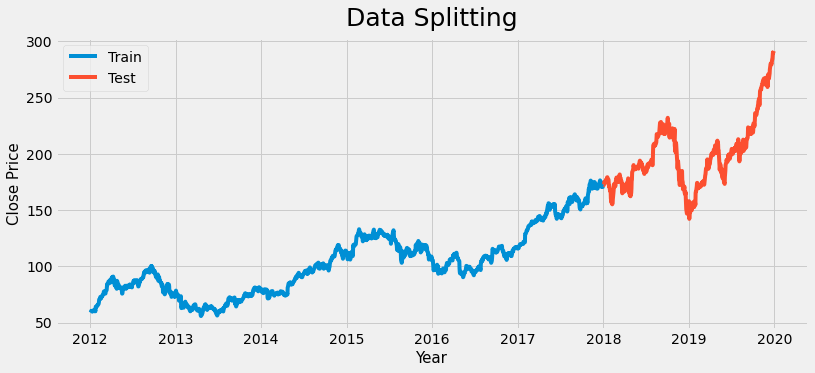

In [53]:
plt.figure(figsize=(12,5))
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.title("Data Splitting", size = 25, y = 1.02)
plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend()
plt.show()

## ARIMA Model Building

In [61]:
model_arima = ARIMA(train['Close'],order = (2,1,2))
result = model_arima.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1509
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2790.587
Date:                Mon, 06 Feb 2023   AIC                           5591.173
Time:                        10:37:06   BIC                           5617.766
Sample:                             0   HQIC                          5601.077
                               - 1509                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5351      0.020     26.610      0.000       0.496       0.575
ar.L2         -0.9788      0.019    -51.803      0.000      -1.016      -0.942
ma.L1         -0.5380      0.026    -20.906      0.000      -0.588      -0.488
ma.L2          0.9631      0.024     39.611      0.000       0.915       1.011
sigma2         2.3702      0.052     45.206      0.000       2.267       2.473
===================================================================================
Ljung-Box (L1) (Q):                   0.95   Jarque-Bera (JB):               846.30
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
test_pred = pd.DataFrame(result.predict(len(train),len(train)+501,type='levels'))
test_pred.index = test.index
test_pred

,predicted_mean
Date,
2018-01-02,169.449940
2018-01-03,169.428355
2018-01-04,169.201530
2018-01-05,169.101272
2018-01-08,169.269631
...,...
2019-12-23,169.284930
2019-12-24,169.285603
2019-12-26,169.286644


## ARIMA prediction price visualizing 

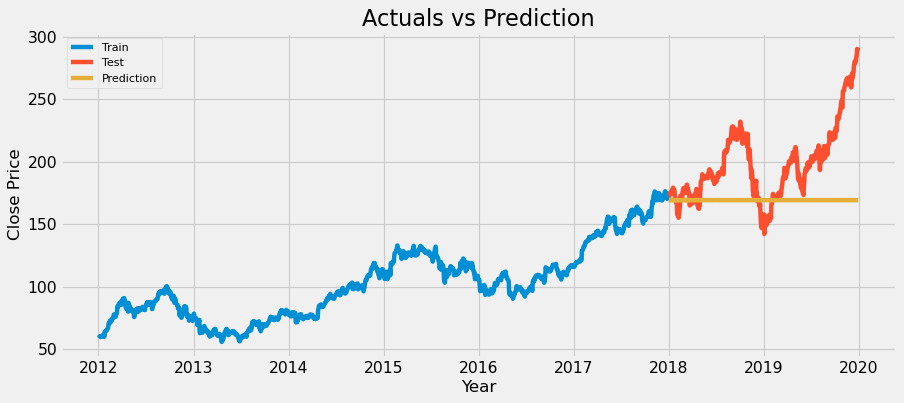

In [63]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], label='Test')
plt.plot(test_pred, label='Prediction')
plt.title('Actuals vs Prediction');plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend(loc='upper left', fontsize=10)
plt.show()

## ARIMA Model Error Report

In [64]:
from sklearn.metrics import mean_absolute_percentage_error

print('ARIMA Mode Error Report')
print('=======================================')

# Evaluate the mean squared difference between observed and predicted values
mse = mean_squared_error(test,test_pred)
print('Mean Squared Error: '+str(mse))

# Summation of the absolute difference between the actual and calculated values of each observation
mae = mean_absolute_error(test,test_pred)
print('Mean Absolute Error: '+str(mae)) 

# Measure of how well a regression line fits the data points.
# RMSE can also be construed as Standard Deviation in the residuals
rmse = math.sqrt(mean_squared_error(test,test_pred))
print('Root Mean Square Error: '+str(rmse))

# Calculated by finding the absolute difference between the actual and predicted values, divided by the actual value.
# Used for checking forecast accuracy.
#mape = np.mean(np.abs(test-test_pred)/np.abs(test))
#print('Mean Absolute Percentage Error: '+str(mape))

mape = mean_absolute_percentage_error(test_pred.predicted_mean,test.Close)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

ARIMA Mode Error Report
Mean Squared Error: 1734.6021584282353
Mean Absolute Error: 31.513994554302062
Root Mean Square Error: 41.64855529821215
Mean Absolute Percentage Error (MAPE)  =  0.18615880407664467


======================================================================================================

# SARIMA Model

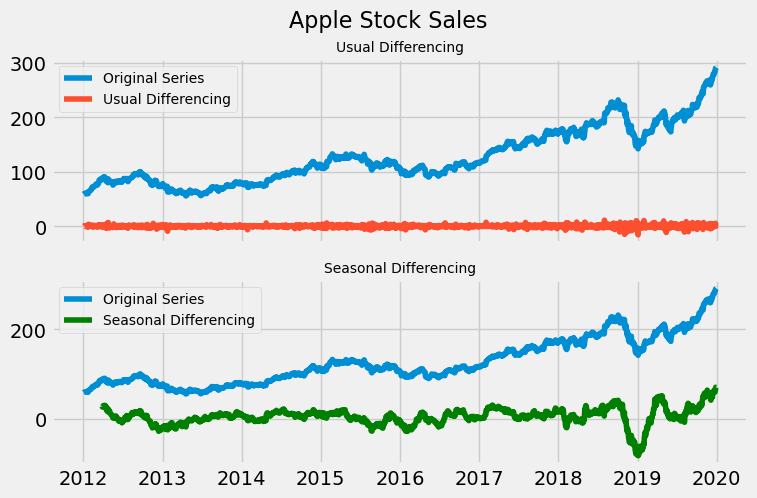

In [65]:
#plot
fig, axes = plt.subplots(2,1,figsize=(8,5),dpi=100,sharex=True)

#usual diffrencing
axes[0].plot(stock["Close"], label='Original Series')
axes[0].plot(stock["Close"].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing', fontsize=10)
axes[0].legend(loc='upper left', fontsize=10)

# Seasinal Dei
axes[1].plot(stock["Close"], label='Original Series')
axes[1].plot(stock["Close"].diff(60), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing', fontsize=10)
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Apple Stock Sales', fontsize=16)
plt.show()

In [66]:
import itertools
p = range(0, 3)
d = range(1,2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 60) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 60)
SARIMAX: (0, 1, 1) x (0, 1, 2, 60)
SARIMAX: (0, 1, 2) x (1, 1, 0, 60)
SARIMAX: (0, 1, 2) x (1, 1, 1, 60)


## SARIMA Model Building (Quarterly basis)

In [68]:
from sklearn import model_selection, datasets

In [69]:
model_SA = sm.tsa.SARIMAX(train['Close'], order=(0,1,2), seasonal_order=(1,1,0,57))
result_SA = model_SA.fit()
result_SA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Close   No. Observations:                 1509
Model:             SARIMAX(0, 1, 2)x(1, 1, [], 57)   Log Likelihood               -2954.624
Date:                             Mon, 06 Feb 2023   AIC                           5917.249
Time:                                     10:37:56   BIC                           5938.369
Sample:                                          0   HQIC                          5925.130
                                            - 1509                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0376      0.025      1.522      0.128      -0.011       0.086
ma.L2         -0.0559      0.025     -2.236      0.025      -0.105      -0.007
ar.S.L57      -0.5173      0.018    -29.211      0.000      -0.552      -0.483
sigma2         3.3954      0.093     36.616      0.000       3.214       3.577
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               183.32
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Model Evaluation

In [70]:
test_pred_SA = pd.DataFrame(result_SA.predict(len(train),len(train)+501,type='levels'))
test_pred_SA.index = test.index
test_pred_SA

,predicted_mean
Date,
2018-01-02,168.805052
2018-01-03,169.231195
2018-01-04,169.907123
2018-01-05,170.721258
2018-01-08,172.488780
...,...
2019-12-23,263.758299
2019-12-24,263.811708
2019-12-26,265.074430


## SARIMA prediction price Visualizing 

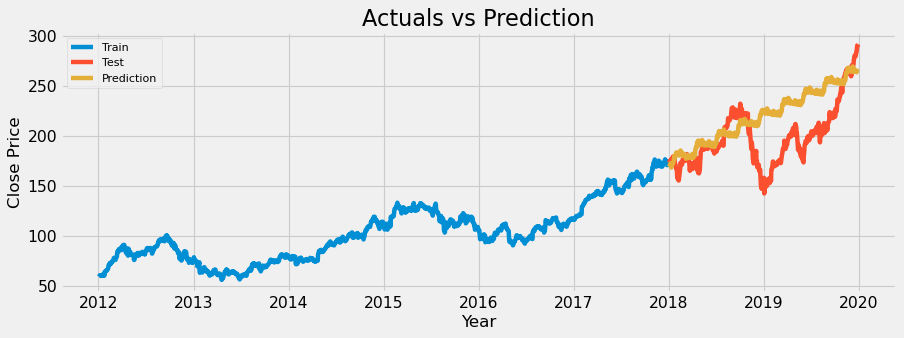

In [71]:
plt.figure(figsize=(12,4), dpi=80)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], label='Test')
plt.plot(test_pred_SA, label='Prediction')
plt.title('Actuals vs Prediction');plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend(loc='upper left', fontsize=10)
plt.show()

## SARIMA Model Error Report

In [74]:
mse = mean_squared_error(test_pred_SA['predicted_mean'],test['Close'])
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test_pred_SA.predicted_mean,test.Close)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_pred_SA.predicted_mean,test.Close)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  1068.9948936567635
Root Mean Squared Error (RMSE) =  32.7
Mean Absolute Error (MAE)  =  25.686033148757506
Mean Absolute Percentage Error (MAPE)  =  0.11347754430078465


SARIMA_Pred= "model_SA.joblib"
pickle.dump(SARIMA_Pred, open(SARIMA_Pred, 'wb'))

model_SA_y = sm.tsa.SARIMAX(train['Close'], order=(2,1,2), seasonal_order=(1,1,0,280))
result_SA_y = model_SA_y.fit()
result_SA_y.summary()

test_pred_SA_y = pd.DataFrame(result_SA_y.predict(len(train),len(train)+501,type='levels'))
test_pred_SA_y.index = test.index
test_pred_SA_y

plt.figure(figsize=(12,4), dpi=80)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], label='Test')
plt.plot(test_pred_SA, label='Prediction')
plt.title('Actuals vs Prediction');plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend(loc='upper left', fontsize=10)
plt.show()

mse = mean_squared_error(test_pred_SA['predicted_mean'],test['Close'])
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test_pred_SA.predicted_mean,test.Close)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_pred_SA.predicted_mean,test.Close)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

======================================================================================================

# LSTM Model   (long short-term memory networks)

In [1118]:
from sklearn.preprocessing import MinMaxScaler

Text(0, 0.5, 'Prices')

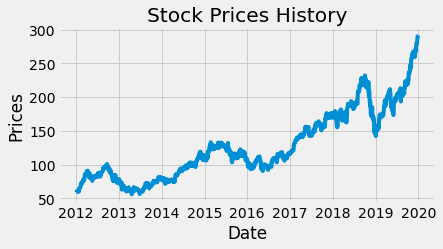

In [1119]:
plt.figure(figsize=(6, 3))
plt.title('Stock Prices History')
plt.plot(data['Close'])
plt.xlabel('Date')
plt.ylabel('Prices')

###### create a line chart for original data of closing price.

###### The plot shows an upward trend over the years. This could be one of the potential to investment.

## Preparation of training set

In [1120]:
close_prices = data['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

###### We required closing prices from our dataset to train our LSTM model. We are going to extract 80% of the closing prices data as our training set

In [1121]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]
x_train = []
y_train = []
for i in range(61, len(train_data)):
    x_train.append(train_data[i-61:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

###### Use the MinMaxScaler to normalize all our stock data ranging from 0 to 1.

###### Create an empty list for a sequence of feature data (x_train) and  (y_train).

###### Create a 61-days window of original data (i-61) for 3 months as our feature data (x_train) and (y_train).

##### Reshaping x_train and y_train into a three-dimensional array as requirement to train a LSTM model

## Preparation of test set

In [1122]:
test_data = scaled_data[training_data_len-61: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(61, len(test_data)):
      x_test.append(test_data[i-61:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

###### Extract the closing prices from normalized dataset (the last 20% of the dataset). Similar to the training set we creating test dataset.

###### Convert the feature data (x_test) and (y_test) into array and reshape x_test and y_test into a three-dimensional array

## LSTM Model Building 

In [1123]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 61, 100)           40800     
                                                                 
 lstm_13 (LSTM)              (None, 100)               80400     
                                                                 
 dense_12 (Dense)            (None, 25)                2525      
                                                                 
 dense_13 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


###### LSTM layer by giving it 100 units and return_sequence to true so that the output of the layer will be of same length.

###### In second LSTM layer with also 100 units. But we set the return_sequence to false for this time to only return the last output in sequence.

###### We add dense layer with 25 units from provious layer and another dense layer specifies the output of 1 unit.

## Training LSTM Model

In [1125]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
1548/1548 [==============================] - 84s 48ms/step - loss: 1.8360e-04
Epoch 2/3
1548/1548 [==============================] - 76s 49ms/step - loss: 1.8329e-04
Epoch 3/3
1548/1548 [==============================] - 73s 47ms/step - loss: 1.9012e-04


###### we use adam as optimizer and set the mean square error as loss function.

###### we fit training set as 1 batch_size and run the training for 3 epochs.

## Model Evaluation

In [1126]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 3s 62ms/step


In [ ]:
LSTM_predictions=[]
first_batch=x_train[-202:]
current_batch=first_batch.reshape((1,202,1))

for i in range(len(x_test)):
    current_predictions= model.predict(current_batch)[0]
    LSTM_predictions.append(current_predictions)
    current_batch=np.append(current_batch[:,1:,:],[current_predictions],axis=1)


###### Apply the model to predict the stock prices based on the test data.

###### Use the inverse_transform method to denormalize predicted stock prices

## LSTM prediction price Visualizing 

<Figure size 960x400 with 0 Axes>

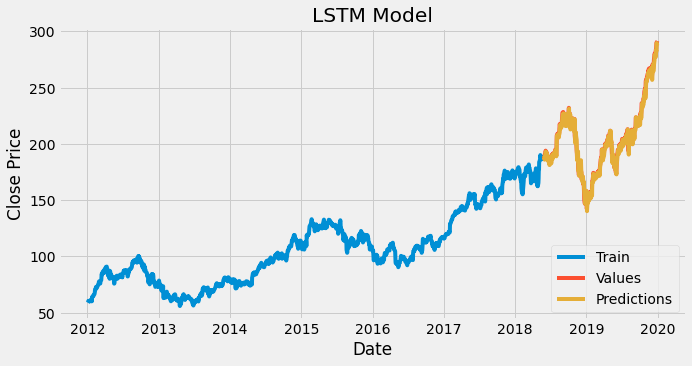

In [1127]:
plt.figure(figsize=(12,5), dpi=80)
St_data = data.filter(['Close'])
train = St_data[:training_data_len]
validation = St_data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(10,5))
plt.title('LSTM Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train)
plt.plot(validation[['Close','Predictions']])
plt.legend(['Train','Values','Predictions'], loc='lower right')
plt.show()

## LSTM Model Error Report

In [1128]:
print('LSTM Model Error Report')
print('=======================================')

# Evaluate the mean squared difference between observed and predicted values
mse = mean_squared_error(y_test,predictions)
print('Mean Squared Error : '+str(mse))

# Summation of the absolute difference between the actual and calculated values of each observatio
mae = mean_absolute_error(y_test,predictions)
print('Mean Absolute Error: '+str(mae))

# Measure of how well a regression line fits the data points.
#RMSE can also be construed as Standard Deviation in the residuals
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print('Root Mean Square Error: '+str(rmse))

# Calculated by finding the absolute difference between the actual and predicted values, divided by the actual value.
# Used for checking forecast accuracy.
mape = np.mean(np.abs(predictions - y_test)/np.abs(y_test))
print('Mean Absolute percentage error: '+str(mape))

LSTM Model Error Report
Mean Squared Error : 13.869709939419137
Mean Absolute Error: 2.8035460277300017
Root Mean Square Error: 3.7242059475033247
Mean Absolute percentage error: 0.16097095311496817


###### Apply RMSE formula to calculate the discrepancy between the predicted prices and real prices (y_test) and display the result.

###### The result shows RMSE is low . The model is working well.